In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

In [2]:
import face_recognition as fr

In [3]:
img1 = fr.load_image_file('messi.jpg')
img2 = fr.load_image_file('ronaldo.jpg')
img3 = fr.load_image_file('messi2.jpeg')

In [7]:
img1_enc = fr.face_encodings(img1)[0]

In [9]:
img1_enc.shape

(128,)

In [10]:
img2_enc = fr.face_encodings(img2)[0]
img3_enc = fr.face_encodings(img3)[0]

In [11]:
img2_enc.shape

(128,)

In [12]:
img3_enc.shape

(128,)

In [13]:
db_d = {'features':[img1_enc,img2_enc,img3_enc],'label':['messi','ronaldo','messi']}

In [14]:
db = pd.DataFrame(db_d)

In [15]:
db

,features,label
0,"[-0.08195223659276962, 0.11779557913541794, -0...",messi
1,"[-0.1972106546163559, 0.10987276583909988, 0.0...",ronaldo
2,"[-0.1048058494925499, 0.21991509199142456, 0.0...",messi


In [16]:
pd.to_pickle(db,'face_db.pkl')

In [17]:
loaded_db = pd.read_pickle('face_db.pkl')

In [18]:
loaded_db

,features,label
0,"[-0.08195223659276962, 0.11779557913541794, -0...",messi
1,"[-0.1972106546163559, 0.10987276583909988, 0.0...",ronaldo
2,"[-0.1048058494925499, 0.21991509199142456, 0.0...",messi


In [22]:
loaded_db['features'].values.tolist()

[array([-0.08195224,  0.11779558, -0.01635283, -0.01465822, -0.18867306,
         0.1258038 ,  0.00854704, -0.04944235,  0.10620625, -0.08761718,
         0.25661477, -0.11075939, -0.2956709 , -0.04430807, -0.07967894,
         0.14484459, -0.11662865, -0.09750845, -0.21017459, -0.17776123,
        -0.02921933,  0.02917239,  0.00324161,  0.04106348, -0.23219591,
        -0.27096966, -0.00614034, -0.16593093,  0.05394638, -0.12740044,
        -0.07219993,  0.09745438, -0.1099368 , -0.07105465,  0.04151046,
         0.05223315, -0.03908642, -0.05906308,  0.21769165, -0.09034602,
        -0.13403611,  0.12259667,  0.13738073,  0.28944406,  0.1205425 ,
         0.02488644,  0.02998332, -0.06350243,  0.15924871, -0.19959491,
         0.11080751,  0.15489604,  0.18870756,  0.11492258,  0.0557697 ,
        -0.18536383, -0.02268932,  0.20573856, -0.1369189 ,  0.05025003,
         0.0494682 , -0.00425828, -0.053708  , -0.12470821,  0.22294694,
         0.16066086, -0.11119939, -0.18407542,  0.1

In [19]:
newenc1 = fr.face_encodings(fr.load_image_file('messi3.jpg'))[0]

In [23]:
res = fr.compare_faces(loaded_db['features'].values.tolist(),newenc1)

In [24]:
res

[True, False, True]

In [27]:
loaded_db['label'][res].values[0]

'messi'

In [42]:
def predict(img_name):
    newenc1 = fr.face_encodings(fr.load_image_file(img_name))[0]
    res = fr.compare_faces(loaded_db['features'].values.tolist(),newenc1,tolerance=0.5)    
    if sum(res):
        return loaded_db['label'][res].values[0]
    return 'unknown'

In [43]:
predict('ronaldo2.jpg')

'ronaldo'

In [44]:
predict('bale.jpg')

'unknown'

In [45]:
predict('messi3.jpg')

'messi'

In [46]:
h = cv2.HOGDescriptor()

In [48]:
h.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [49]:
h

<HOGDescriptor 0000013F10803E10>

In [52]:
h.svmDetector

array([[ 0.05359386],
       [-0.14721455],
       [-0.0553217 ],
       ...,
       [-0.04229729],
       [ 0.10666174],
       [-6.6657915 ]], dtype=float32)

In [51]:
h.svmDetector.shape

(3781, 1)

In [67]:
ppl = cv2.imread('people2.jpg')

In [68]:
val = h.detectMultiScale(ppl, scale=1.1, winStride=(4,4),padding=(8,8))

In [66]:
val

(array([[ 31,   0, 128, 249],
        [227,   0, 128, 241],
        [164,   0, 129, 251],
        [ 68,  74, 103, 206],
        [138,  67,  74, 148]], dtype=int32),
 array([[0.77127987],
        [0.97198406],
        [0.44658683],
        [0.68631709],
        [0.34140174]]))

In [83]:
ppl = cv2.imread('people2.jpg')
h = cv2.HOGDescriptor()
h.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
val = h.detectMultiScale(ppl, scale=1.1, winStride=(3,3),padding=(8,8))
for i,(x,y,w,h) in enumerate(val[0]):
    print(val[1][i][0])
    if val[1][i][0]>0.4:
        cv2.rectangle(ppl, (x,y), (x+w, y+h), (0,0,255),2)
cv2.imshow('people',ppl)
cv2.waitKey(0)


0.9810690486629028
0.7702426176401787
0.4949490916915238
1.0099050131975673


-1

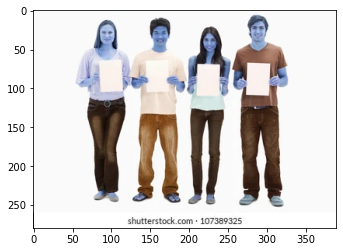

In [69]:
plt.imshow(ppl)